###Simple Linear Regression Model 
Goal: Predict the student score given the number of hours spent on studies. 

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_csv("student_scores.csv")

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


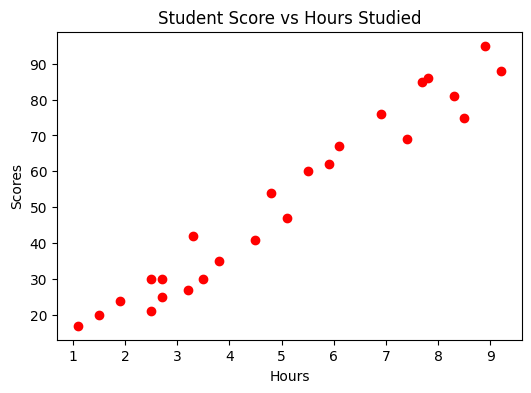

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], df["Scores"], "ro")
plt.title("Student Score vs Hours Studied")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

Calculate Coefficients Manually



In [ ]:
#mean
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

In [ ]:
#calculate terms needed for the numerator and denominator of beta
df['xycov'] = (df["Hours"] - xmean) * (df["Scores"] - ymean)
df['xvar'] = (df["Hours"] - xmean) ** 2

#calculating coefficients 
slope = df['xycov'].sum() / df['xvar'].sum()
intercept  = ymean - (slope * xmean)
print(f'slope = {slope}')
print(f'intercept = {intercept}')


slope = 9.775803390787473
intercept = 2.4836734053731817


Making Prediction 

In [ ]:
#computing the score of a student who studied for 7 hours 
intercept + slope * 7 

70.9142971408855

In [ ]:
#computation on the dataset
scores_pred = intercept + slope * df['Hours']
scores_pred

0     26.923182
1     52.340271
2     33.766244
3     85.578002
4     36.698985
5     17.147378
6     92.421065
7     56.250592
8     83.622842
9     28.878343
10    77.757360
11    60.160913
12    46.474789
13    34.743825
14    13.237057
15    89.488324
16    26.923182
17    21.057700
18    62.116074
19    74.824618
20    28.878343
21    49.407530
22    39.631726
23    69.936717
24    78.734940
Name: Hours, dtype: float64

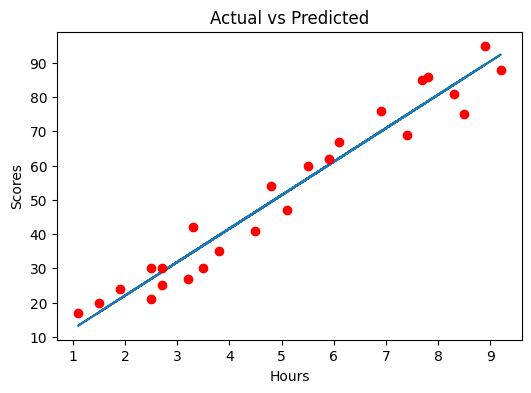

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df["Hours"], scores_pred) #reg line
plt.plot(df["Hours"], df["Scores"], "ro") #scatter plot with actual data
plt.title("Actual vs Predicted")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

###Multiple Linear Regression Model
Goal: Predict petrol consumption of a country based on various factors such as tax, distance of highways and  population with driving license.

In [ ]:
df = pd.read_csv("petrol_consumption.csv")


In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.shape

(48, 5)

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


Text(0, 0.5, 'Petrol Consumption')

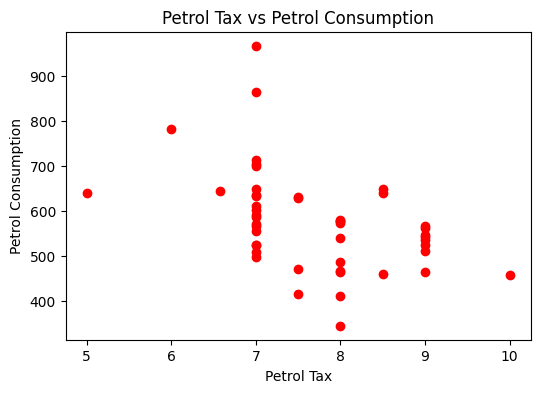

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df["Petrol_tax"], df["Petrol_Consumption"], "ro")
plt.title("Petrol Tax vs Petrol Consumption")
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption")

Identify Outliers

Text(0, 0.5, 'Petrol Consumption')

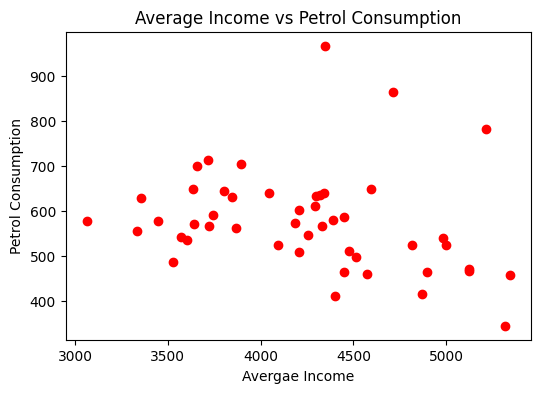

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df["Average_income"], df["Petrol_Consumption"], "ro")
plt.title("Average Income vs Petrol Consumption")
plt.xlabel("Avergae Income")
plt.ylabel("Petrol Consumption")

Train the Model

In [ ]:
Y = df["Petrol_Consumption"]
X = df[["Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-81.76841445582784

In [ ]:
regressor.coef_

array([-6.46404236e-02,  1.82608532e-03,  1.62661302e+03])

Make Predictions

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
results = pd.DataFrame({"ACtual" : y_test, "Predicted" : y_pred})
print(results)

    ACtual   Predicted
27     631  627.979613
40     587  657.377300
26     577  596.594374
43     591  507.240521
24     460  523.612579
37     704  631.182638
12     525  553.189309
19     640  749.819293
4      410  519.542887
25     566  571.248652


Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error: {MAE: .2f}') #same unit as petrol consumption
print(f'Mean Squared Error: {MSE: .2f}')
print(f'Root Mean Squared Error: {RMSE: .2f}') #same unit as petrol consumption

Mean Absolute Error:  56.60
Mean Squared Error:  4659.27
Root Mean Squared Error:  68.26


In [ ]:
#R-Squared Score
regressor.score(X_test, y_test)

0.3055078869820721

In [ ]:
#R-Squared Score
regressor.score(X_train, y_train)

0.6577092822857908

R-Squared Score close to 1 indicates a good model performance or goodness of the data fit. The regressor performs well on the training set compared to the testing set. 

Possible Improvements: 
1. Increase the size of the data 
2. Try nonlinear relationship 
3. May require more features 